### 1. Dataset Description  <a id='columns'>

Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? 



In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import pandas_profiling
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from collections import Counter


ModuleNotFoundError: No module named 'xgboost'

In [68]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_mode_interactivity = "all"

In [69]:
x1=pd.ExcelFile(r'Data_Train.xlsx')
x2=pd.ExcelFile(r'Data_Test.xlsx')

In [70]:
x1.sheet_names

['Sheet1']

### create a list of six columns

1. Qualification
2. Experience
4. Place3. Rating

5. Profile
6. Miscellaneous_Info
7. Fees

In [5]:
# Define the columns to be read

In [71]:
columns_read=['Title','Author','Edition','Ratings','Reviews','Synopsis','Genre','BookCategory','Price']
columns_readt=['Title','Author','Edition','Ratings','Reviews','Synopsis','Genre','BookCategory']

### parse the data and read the six columns present in 7.1 sheet of data and skip first six rows and set skipfooter=14 and the column names as the list defined above

In [72]:
ds_input = x1.parse(u'Sheet1',names=columns_read)
ds_input.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [73]:
dst_input = x2.parse(u'Sheet1',names=columns_readt)
dst_input.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [9]:
#report = pandas_profiling.ProfileReport(ds_input)
#covert profile report as html file
#report.to_file("ds_input.html")

In [74]:
 ds_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Ratings         6237 non-null object
Reviews         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.6+ KB


In [75]:
dst_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Ratings         1560 non-null object
Reviews         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [76]:
 ds_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Ratings         6237 non-null object
Reviews         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.6+ KB


In [77]:
dst_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Ratings         1560 non-null object
Reviews         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [78]:
dst_input.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [83]:
#combining the train and test 
y_train = ds_input['Price']
train_nomissing = ds_input.drop('Price',axis=1)
test_nomissing = dst_input
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [84]:
 combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 8 columns):
Title           7797 non-null object
Author          7797 non-null object
Edition         7797 non-null object
Ratings         7797 non-null object
Reviews         7797 non-null object
Synopsis        7797 non-null object
Genre           7797 non-null object
BookCategory    7797 non-null object
dtypes: object(8)
memory usage: 548.2+ KB


In [85]:
#report = pandas_profiling.ProfileReport(combined_set)
#covert profile report as html file
#report.to_file("ds_combined.html")

In [89]:
#Extracting Ratings
ds_ratings = combined_set["Ratings"].str.split(" ",n=1,expand=True)
combined_set["Ratings_N"]= ds_ratings[0]
combined_set["Ratings_N"] = combined_set["Ratings_N"].astype(str).astype(float)
combined_set.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Ratings_N
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,4.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",3.9
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,4.8
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",4.1
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",5.0


In [97]:
combined_set['Reviews'] = combined_set['Reviews'].str.replace('[^\w\s]','')
combined_set['Reviews'].head()

0     8 customer reviews
1    14 customer reviews
2     6 customer reviews
3    13 customer reviews
4      1 customer review
Name: Reviews, dtype: object

In [99]:
#Extracting Reviews
ds_reviews = combined_set["Reviews"].str.split(" ",n=1,expand=True)
combined_set["Reviews_N"]= ds_reviews[0].astype(str).astype(int)
combined_set.head()

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Ratings_N,Reviews_N
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,4.0,8
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",3.9,14
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,4.8,6
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",4.1,13
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",5.0,1


In [100]:
 combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 10 columns):
Title           7797 non-null object
Author          7797 non-null object
Edition         7797 non-null object
Ratings         7797 non-null object
Reviews         7797 non-null object
Synopsis        7797 non-null object
Genre           7797 non-null object
BookCategory    7797 non-null object
Ratings_N       7797 non-null float64
Reviews_N       7797 non-null int32
dtypes: float64(1), int32(1), object(8)
memory usage: 639.6+ KB


### Data exploration

In [35]:
df_train =  pd.concat([combined_set[:train_nomissing.shape[0]],y_train], axis=1) # Up to the last initial training set row
dst_input = combined_set[train_nomissing.shape[0]:]

In [1359]:
#spliting misc for fees
ds_fees = dst_input["Miscellaneous_Info"].str.split("₹",n=1,expand=True)
ds_fees1= ds_fees[1].str.split(" ",n=1,expand=True)
ds_fees1[0]=ds_fees1[0].str.replace(",",'')
ds_fees1[0].fillna(0,inplace=True)

In [1360]:
dst_input['misc_fees']= ds_fees1[0].astype(str).astype(int)
dst_input['misc_fees']=dst_input['misc_fees'].apply(lambda misc_fees: 100 if misc_fees>999 else misc_fees )

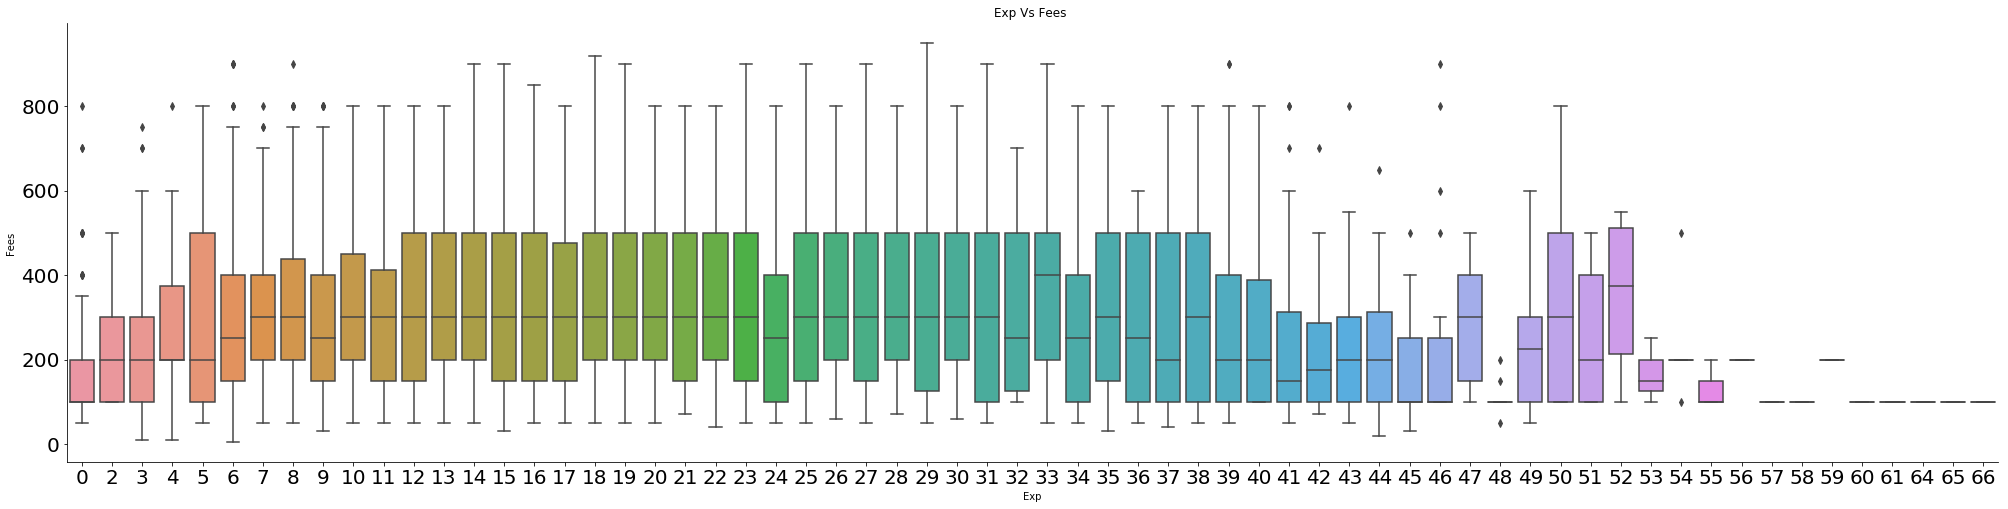

In [1276]:
mx = sns.factorplot(x="Exp",y="Fees", data=df_train, kind="box", size=7,aspect=4)
mx.set(ylabel='Fees ')
plt.title('Exp Vs Fees ');
plt.show()

In [1277]:
df_train =df_train.drop(df_train.loc[(df_train['Exp']==0) & (df_train['Fees']>390) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==3) & (df_train['Fees']>600) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==4) & (df_train['Fees']>600) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==6) & (df_train['Fees']>790) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==7) & (df_train['Fees']>700) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==8) & (df_train['Fees']>790) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==9) & (df_train['Fees']>790) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==39) & (df_train['Fees']>800) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==41) & (df_train['Fees']>600) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==42) & (df_train['Fees']>600) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==43) & (df_train['Fees']>600) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==44) & (df_train['Fees']>500) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==45) & (df_train['Fees']>400) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==46) & (df_train['Fees']>400) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==48) & (df_train['Fees']<100) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==48) & (df_train['Fees']>100) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==54) & (df_train['Fees']==100) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Exp']==54) & (df_train['Fees']>200) ].index.tolist()).reset_index(drop=True)



<Figure size 360x144 with 0 Axes>

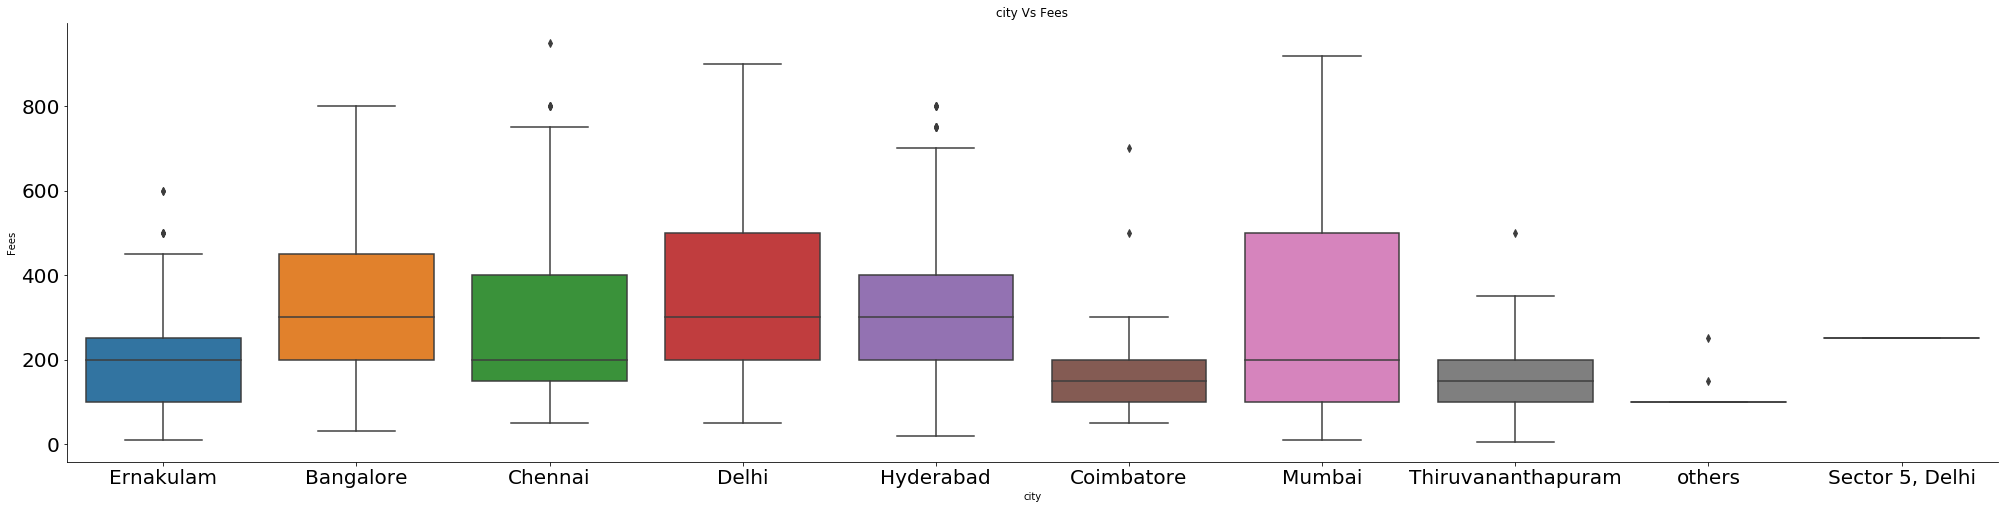

In [1278]:
plt.figure(figsize=(5,2))
mx = sns.factorplot(x="city", y="Fees", data=df_train, kind="box", size=7 ,aspect=4)
mx.set(xlabel='city')
mx.set(ylabel= 'Fees')
plt.title('city Vs Fees');
plt.show()

In [1279]:
#df_train =df_train.drop(df_train.loc[(df_train['city']=="Bangalore") & (df_train['Fees']>800) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['city']=="Chennai") & (df_train['Fees']>790) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['city']=="Ernakulam") & (df_train['Fees']>390) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['city']=="Hyderabad") & (df_train['Fees']>700) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['city']=="Coimbatore") & (df_train['Fees']>400) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['city']=="Thiruvananthapuram") & (df_train['Fees']>400) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['city']=="others")].index.tolist()).reset_index(drop=True)


<Figure size 360x144 with 0 Axes>

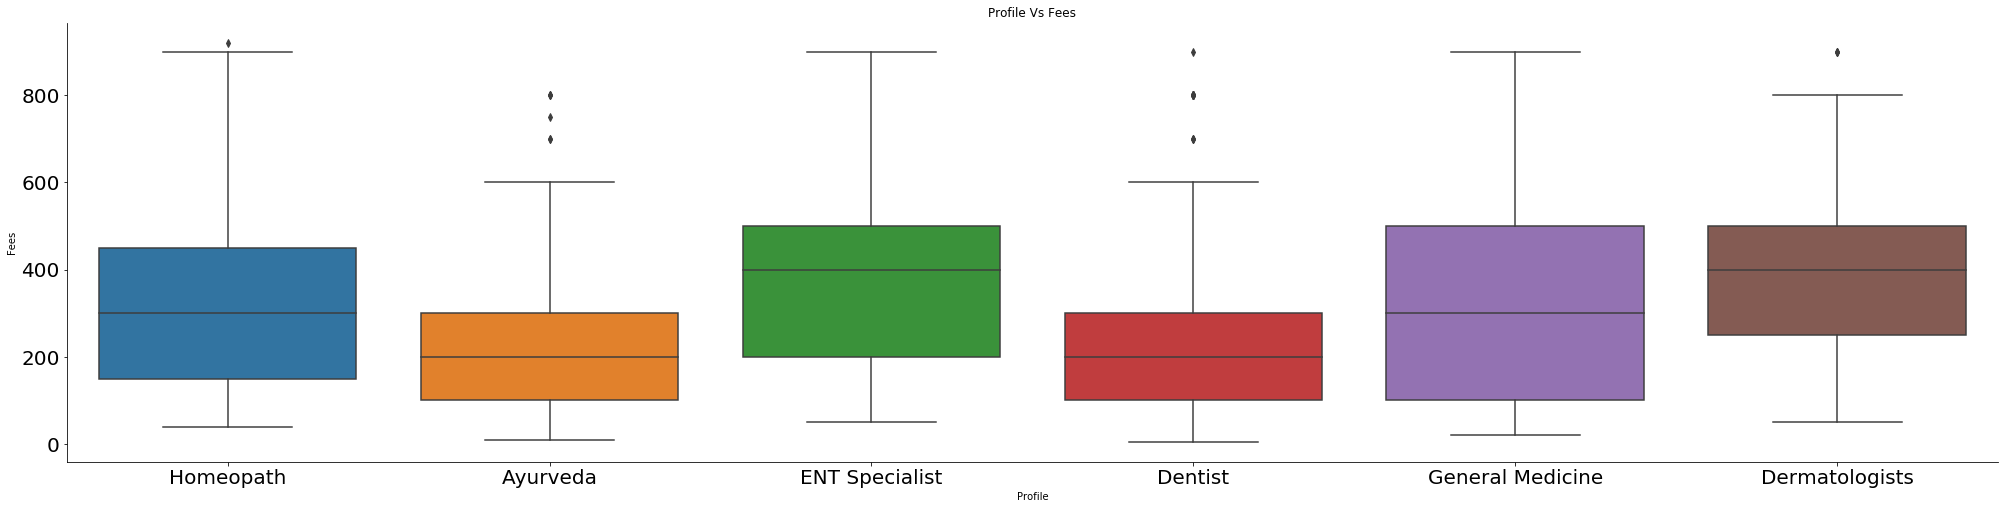

In [1280]:
plt.figure(figsize=(5,2))
mx = sns.factorplot(x="Profile", y="Fees", data=df_train, kind="box", size=7 ,aspect=4)
mx.set(xlabel='Profile')
mx.set(ylabel= 'Fees')
plt.title('Profile Vs Fees');
plt.show()

In [1281]:
df_train =df_train.drop(df_train.loc[(df_train['Profile']=="Ayurveda") & (df_train['Fees']>600) ].index.tolist()).reset_index(drop=True)
#df_train =df_train.drop(df_train.loc[(df_train['Profile']=="ENT Specialist") & (df_train['Fees']>800) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Profile']=="Dentist") & (df_train['Fees']>600) ].index.tolist()).reset_index(drop=True)
df_train =df_train.drop(df_train.loc[(df_train['Profile']=="Dermatologists") & (df_train['Fees']>790) ].index.tolist()).reset_index(drop=True)


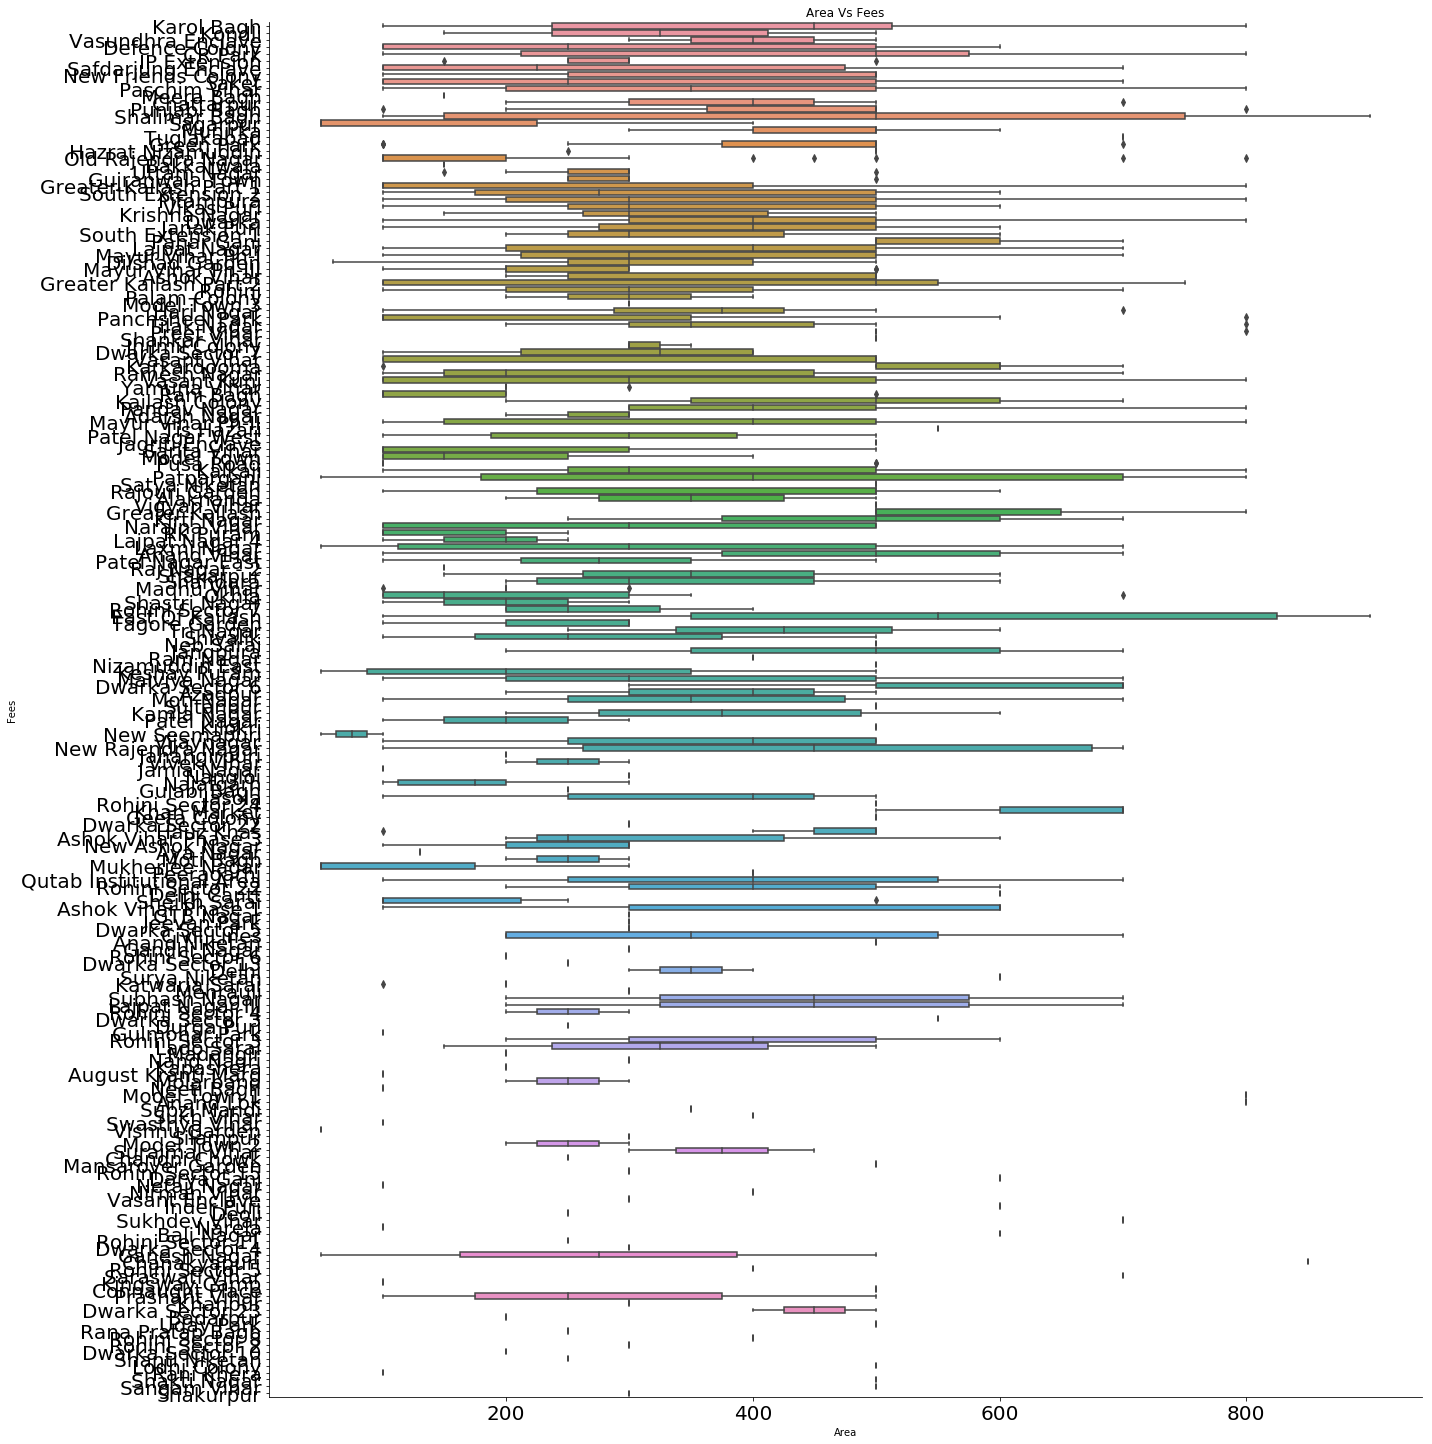

In [1282]:
#plt.figure(figsize=(5,2))
mx = sns.factorplot(y="area", x="Fees", data=df_train.loc[(df_train['city']=="Delhi")], kind="box", size=20 ,aspect=1)
mx.set(xlabel='Area')
mx.set(ylabel= 'Fees')
plt.title('Area Vs Fees');
plt.show()

In [46]:
import numpy as np

def detect_outliers(df,n,features,area_list):
    outlier_indices = []
    
    for col in features:
        for ar in area_list:
            
            Q1 = np.percentile(df['Fees'][df[col]==ar], 25)
            Q3 = np.percentile(df['Fees'][df[col]==ar],75)
            IQR = Q3 - Q1
                    
            # outlier step
            outlier_step = 1.5 * IQR
        
            # Determine a list of indices of outliers for feature col
            b = (df['Fees'][df[col]==ar] < Q1 - outlier_step) | (df['Fees'][df[col]==ar] > Q3 + outlier_step )
            c = b.index.tolist()
            d = b.tolist()
            for i in range(len(c)-1):
                if d[i]==True:
                    outlier_list_col = c[i]
                    # append the found outlier indices for col to the list of outlier indices 
                    outlier_indices.extend([outlier_list_col])
        outlier_indices = collections.Counter(outlier_indices)        
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
area_list=df_train["area"].values
Outliers_to_drop = detect_outliers(df_train,4,["area"],area_list)

In [47]:
len(Outliers_to_drop )                     

174

In [634]:
df_train = df_train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
df_train.info()

NameError: name 'Outliers_to_drop' is not defined

In [1283]:
#combining the train and test 
ds_input = df_train
y_train = ds_input['Fees']
train_nomissing = ds_input.drop('Fees',axis=1)
test_nomissing = dst_input.drop('misc_fees',axis=1)
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

sns.lmplot( 'Fees','misc_feedback', data= df_train, fit_reg=False,col="city",hue="area", size=5,aspect=1)

plt.title('Scatterplot of people grouped by Feedback and Fees across city')

In [1284]:
fee_df_train = pd.DataFrame(ds_input)

In [1285]:
#fee_df_train.to_excel('fee_df_train.xlsx')

### 4. Feature Engineering  <a id='feature'>

In [1286]:
# agegroup below 30 and above 59 as a categorical feature
def Profile_output(pro):
    if(pro in ["Dermatologists","ENT Specialist"]):
        pro='profile_1'
    elif (pro in ["Homeopath","General Medicine"]):
        pro='profile_2'
    else:
        pro='profile_3'
    return pro
      
combined_set['is_profile'] = combined_set['Profile'].apply(Profile_output)

In [1287]:
# agegroup below 30 and above 59 as a categorical feature
def Exp_output(Ex):
    if ((Ex>7 and Ex<23) or (Ex>25 and Ex<31)):
        Ex='Ex_1'
    elif Ex>52:
        Ex='Ex_2'
    return Ex
      
combined_set['is_Exp'] = combined_set['Exp'].apply(Exp_output)

In [1288]:
# agegroup below 30 and above 59 as a categorical feature
def area_output(Ex):
    if (Ex in ["Old Rajendra Nagar","Pusa Road","Sarita Vihar","Saket","Greater Kailash Part 1","Shalimar Bagh","Vasant Kunj",
               "Safdarjung Enclave","Panchsheel Park"]):
        Ex='100D'
    elif (Ex in ["Dwarka","Janak Puri","Paschim Vihar","Green Park","Vasant Vihar","Rajouri Garden",
               "Lajpat Nagar"]):
        Ex='500D'
    return Ex
      
combined_set['area1'] = combined_set['area'].apply(area_output)

def upd_loc(loc):
    if(loc in ["Bengaluru","Hyderabad","Delhi","sector 5,Delhi","Mumbai","Chennai"]):
        loc='Tier_1'      
    else:
        loc="Tier_2"
    return loc

combined_set["city_new"]= combined_set['city'].apply(upd_loc)

In [1289]:
#city_dummies = pd.get_dummies(combined_set.city, prefix='city')
#combined_set = pd.concat([combined_set,city_dummies], axis=1)
#area_dummies = pd.get_dummies(combined_set.area1, prefix='area')
#combined_set = pd.concat([combined_set,area_dummies], axis=1)
Profile_dummies = pd.get_dummies(combined_set.is_profile, prefix='Profile')
combined_set = pd.concat([combined_set,Profile_dummies], axis=1)
Exp_dummies = pd.get_dummies(combined_set.is_Exp, prefix='Exp')
combined_set = pd.concat([combined_set,Exp_dummies], axis=1)


In [1290]:
# Merge job_desig+ job_type +key_skills
#combined_set["combined"] = combined_set["Qualification"]+ ' '+combined_set["Miscellaneous_Info"]

In [1291]:
dummy1_combined_set=combined_set

In [1292]:
#combined_set=dummy1_combined_set

In [1293]:
combined_set.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,misc_feedback,Exp,area,city,...,Exp_45,Exp_46,Exp_47,Exp_48,Exp_49,Exp_50,Exp_51,Exp_52,Exp_Ex_1,Exp_Ex_2
0,"BHMS, MD - Homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",16,24,Kakkanad,Ernakulam,...,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",76,12,Whitefield,Bangalore,...,0,0,0,0,0,0,0,0,1,0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,15.0,"Mathikere - BEL, Bangalore",ENT Specialist,Others,11,9,Mathikere - BEL,Bangalore,...,0,0,0,0,0,0,0,0,1,0
3,"BSc - Zoology, BAMS",12 years experience,15.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",4,12,Bannerghatta Road,Bangalore,...,0,0,0,0,0,0,0,0,1,0
4,BAMS,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",4,20,Keelkattalai,Chennai,...,0,0,0,0,0,0,0,0,1,0


bangl_counts = combined_set['loc_Bengaluru'].loc[combined_set['loc_Bengaluru']==1].groupby(combined_set['salary']).count()
bangl_counts/len(combined_set)

Hydl_counts = combined_set['loc_Hyderabad'].loc[combined_set['loc_Hyderabad']==1].groupby(combined_set['salary']).count()
Hydl_counts/len(combined_set)

muml_counts = combined_set['loc_Mumbai'].loc[combined_set['loc_Mumbai']==1].groupby(combined_set['salary']).count()
muml_counts/len(combined_set)

In [1294]:
combined_set=combined_set.drop(['Experience','Profile','Exp','is_Exp','is_profile'],axis=1)

In [1295]:
combined_set.head()

,Qualification,Rating,Place,Miscellaneous_Info,misc_feedback,area,city,area1,Profile_profile_1,Profile_profile_2,...,Exp_45,Exp_46,Exp_47,Exp_48,Exp_49,Exp_50,Exp_51,Exp_52,Exp_Ex_1,Exp_Ex_2
0,"BHMS, MD - Homeopathy",100.0,"Kakkanad, Ernakulam","100% 16 Feedback Kakkanad, Ernakulam",16,Kakkanad,Ernakulam,Kakkanad,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"BAMS, MD - Ayurveda Medicine",98.0,"Whitefield, Bangalore","98% 76 Feedback Whitefield, Bangalore",76,Whitefield,Bangalore,Whitefield,0,0,...,0,0,0,0,0,0,0,0,1,0
2,"MBBS, MS - Otorhinolaryngology",15.0,"Mathikere - BEL, Bangalore",Others,11,Mathikere - BEL,Bangalore,Mathikere - BEL,1,0,...,0,0,0,0,0,0,0,0,1,0
3,"BSc - Zoology, BAMS",15.0,"Bannerghatta Road, Bangalore","Bannerghatta Road, Bangalore ₹250 Available on...",4,Bannerghatta Road,Bangalore,Bannerghatta Road,0,0,...,0,0,0,0,0,0,0,0,1,0
4,BAMS,100.0,"Keelkattalai, Chennai","100% 4 Feedback Keelkattalai, Chennai",4,Keelkattalai,Chennai,Keelkattalai,0,0,...,0,0,0,0,0,0,0,0,1,0


### NLP

###  Lower case   <a id='erf'>

In [101]:
combined_set['BookCategory'] = combined_set['BookCategory'].apply(lambda x: " ".join(x.lower() for x in x.split()))
combined_set['BookCategory'].head()

0                      action & adventure
1    biographies, diaries & true accounts
2                                  humour
3               crime, thriller & mystery
4                arts, film & photography
Name: BookCategory, dtype: object

### Removing Punctuation  <a id='erf'>

In [102]:
combined_set['BookCategory'] = combined_set['BookCategory'].str.replace('[^\w\s]','')
combined_set['BookCategory'].head()

0                     action  adventure
1    biographies diaries  true accounts
2                                humour
3               crime thriller  mystery
4                arts film  photography
Name: BookCategory, dtype: object

### Removal of Stop Words <a id='erf'>

In [103]:
import nltk.corpus
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
combined_set['BookCategory'] = combined_set['BookCategory'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
combined_set['BookCategory'].head()

[nltk_data] Downloading package stopwords to C:\Users\Richa
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                     action adventure
1    biographies diaries true accounts
2                               humour
3               crime thriller mystery
4                arts film photography
Name: BookCategory, dtype: object

In [104]:
from textblob import TextBlob
combined_set['BookCategory'][:5].apply(lambda x: str(TextBlob(x).correct()))

ModuleNotFoundError: No module named 'textblob'

### Stemming<a id='erf'>

In [105]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
combined_set['BookCategory'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                 action adventur
1    biographi diari true account
2                          humour
3          crime thriller mysteri
4            art film photographi
Name: BookCategory, dtype: object

### Lemmatization<a id='erf'>

In [106]:
#from textblob import Word
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()
combined_set['BookCategory'] = combined_set['BookCategory'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
combined_set['BookCategory'].head()

[nltk_data] Downloading package wordnet to C:\Users\Richa
[nltk_data]     Tripathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                action adventure
1    biography diary true account
2                          humour
3          crime thriller mystery
4            art film photography
Name: BookCategory, dtype: object

###  Lower case   <a id='erf'>

In [107]:
combined_set['Miscellaneous_Info']= combined_set['Miscellaneous_Info'].str.replace('\d+','')
combined_set['Miscellaneous_Info']=combined_set['Miscellaneous_Info'].str.replace('%','')
combined_set['Miscellaneous_Info']=combined_set['Miscellaneous_Info'].str.replace(' ₹','')

KeyError: 'Miscellaneous_Info'

In [1303]:
ds_1 = combined_set['area'].str.split(" ",n=1,expand=True)
ds_1[1] = ds_1[1].fillna(value='')
ds_1[0] = ds_1[0].apply(lambda x: " ".join(x.lower() for x in x.split()))
ds_1[1] = ds_1[1].apply(lambda x: " ".join(x.lower() for x in x.split()))
ds_1[1] = ds_1[1].str.replace('[^\w\s]','')

In [1304]:
final_list =  ds_1[0].tolist() + ds_1[1].tolist() + combined_set['city'].apply(lambda x: " ".join(x.lower() for x in x.split())).tolist()

In [1305]:
combined_set['Miscellaneous_Info'] = combined_set['Miscellaneous_Info'].apply(lambda x: " ".join(x.lower() for x in x.split()))
combined_set['Miscellaneous_Info'].head()

0                         feedback kakkanad, ernakulam
1                       feedback whitefield, bangalore
2                                               others
3    bannerghatta road, bangalore available on sun,...
4                       feedback keelkattalai, chennai
Name: Miscellaneous_Info, dtype: object

### Removing Punctuation  <a id='erf'>

In [1306]:
combined_set['Miscellaneous_Info'] = combined_set['Miscellaneous_Info'].str.replace('[^\w\s]','')
combined_set['Miscellaneous_Info'].head()

0                         feedback kakkanad ernakulam
1                       feedback whitefield bangalore
2                                              others
3    bannerghatta road bangalore available on sun feb
4                       feedback keelkattalai chennai
Name: Miscellaneous_Info, dtype: object

### Removal of Stop Words <a id='erf'>

In [1307]:
import nltk.corpus
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
combined_set['Miscellaneous_Info']= combined_set['Miscellaneous_Info'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
combined_set['Miscellaneous_Info'].head()

[nltk_data] Error loading stopwords: <urlopen error [WinError 10065] A
[nltk_data]     socket operation was attempted to an unreachable host>


0                      feedback kakkanad ernakulam
1                    feedback whitefield bangalore
2                                           others
3    bannerghatta road bangalore available sun feb
4                    feedback keelkattalai chennai
Name: Miscellaneous_Info, dtype: object

In [1308]:
from textblob import TextBlob
combined_set['Miscellaneous_Info'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                      feedback kakkanad ernakulam
1                    feedback whitefield bangalore
2                                           others
3    bannerghatta road bangalore available sun feb
4                    feedback keelkattalai chennai
Name: Miscellaneous_Info, dtype: object

### Stemming<a id='erf'>

In [1309]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
combined_set['Miscellaneous_Info'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                 feedback kakkanad ernakulam
1                feedback whitefield bangalor
2                                       other
3    bannerghatta road bangalor avail sun feb
4               feedback keelkattalai chennai
Name: Miscellaneous_Info, dtype: object

### Lemmatization<a id='erf'>

In [1310]:
from textblob import Word
nltk.download('wordnet')
combined_set['Miscellaneous_Info'] = combined_set['Miscellaneous_Info'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
combined_set['Miscellaneous_Info'].head()

[nltk_data] Error loading wordnet: <urlopen error [WinError 10065] A
[nltk_data]     socket operation was attempted to an unreachable host>


0                      feedback kakkanad ernakulam
1                    feedback whitefield bangalore
2                                           others
3    bannerghatta road bangalore available sun feb
4                    feedback keelkattalai chennai
Name: Miscellaneous_Info, dtype: object

### Removal of selective words <a id='erf'>

In [1311]:
#sel = ['bds','bams','dermatology','mbbs','general','medicine','bhms']
combined_set['Miscellaneous_Info'] = combined_set['Miscellaneous_Info'].apply(lambda x: " ".join(x for x in x.split() if x not in final_list))
combined_set['Miscellaneous_Info'].head()

0         feedback
1         feedback
2                 
3    available feb
4         feedback
Name: Miscellaneous_Info, dtype: object

###  Lower case   <a id='erf'>

In [1312]:
combined_set['Place'] = combined_set['Place'].apply(lambda x: " ".join(x.lower() for x in x.split()))
combined_set['Place'].head()

0             kakkanad, ernakulam
1           whitefield, bangalore
2      mathikere - bel, bangalore
3    bannerghatta road, bangalore
4           keelkattalai, chennai
Name: Place, dtype: object

### Removing Punctuation  <a id='erf'>

In [1313]:
combined_set['Place'] = combined_set['Place'].str.replace('[^\w\s]','')
combined_set['Place'].head()

0             kakkanad ernakulam
1           whitefield bangalore
2       mathikere  bel bangalore
3    bannerghatta road bangalore
4           keelkattalai chennai
Name: Place, dtype: object

### Removal of Stop Words <a id='erf'>

In [1314]:
import nltk.corpus
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
combined_set['Place'] = combined_set['Place'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
combined_set['Place'].head()

[nltk_data] Error loading stopwords: <urlopen error [WinError 10065] A
[nltk_data]     socket operation was attempted to an unreachable host>


0             kakkanad ernakulam
1           whitefield bangalore
2        mathikere bel bangalore
3    bannerghatta road bangalore
4           keelkattalai chennai
Name: Place, dtype: object

In [1315]:
from textblob import TextBlob
combined_set['Place'][:5].apply(lambda x: str(TextBlob(x).correct()))

0             kakkanad ernakulam
1           whitefield bangalore
2         mathikere be bangalore
3    bannerghatta road bangalore
4           keelkattalai chennai
Name: Place, dtype: object

### Removal of selective words <a id='erf'>

sel = ['bds','bams','dermatology','mbbs','general','medicine','bhms']
combined_set['Qualification'] = combined_set['Qualification'].apply(lambda x: " ".join(x for x in x.split() if x not in sel))
combined_set['Qualification'].head()

### All these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective. <a id='erf'>

### TF-IDFTF-IDF<a id='erf'>

In [108]:
#df_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
#df_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row
combined_set_dummy = combined_set

In [109]:
combined_set = combined_set_dummy

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=300, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(combined_set['BookCategory'])

tfidf_vect = pd.DataFrame(
    (count, word) for word, count in zip(
    train_vect.toarray().tolist()[0],   
    tfidf.get_feature_names()))
tfidf_vect.columns = ['Word', 'Count']
tfidf_vect.sort_values('Count', ascending=False, inplace=True)


tfidf_vect[tfidf_vect['Word']=='singapore']

In [1319]:
tfidf_misc = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect_misc = tfidf_misc.fit_transform(combined_set['Miscellaneous_Info'])

In [1320]:
tfidf_place = TfidfVectorizer(max_features=None, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect_place = tfidf_place.fit_transform(combined_set['Place'])

In [111]:
dfs=pd.DataFrame(train_vect.toarray().tolist(),columns= tfidf.get_feature_names())
#dfs_misc=pd.DataFrame(train_vect_misc.toarray().tolist(),columns= tfidf_misc.get_feature_names())
#dfs_place=pd.DataFrame(train_vect_place.toarray().tolist(),columns= tfidf_place.get_feature_names())

In [112]:
dfs.values[dfs.values > 0] = 1
#dfs_misc.values[dfs_misc.values > 0] = 1
#dfs_place.values[dfs_place.values > 0] = 1

In [113]:
combined_set.reset_index(drop=True,inplace=True)

In [114]:
dfs.reset_index(drop=True,inplace=True)
#dfs_misc.reset_index(drop=True,inplace=True)
#dfs_place.reset_index(drop=True,inplace=True)

dfs_place=dfs_place[dfs_place.columns[~dfs_place.columns.isin(dfs.columns)]]
dfs_misc=dfs_misc[dfs_misc.columns[~dfs_misc.columns.isin(dfs.columns)]]
dfs_misc=dfs_misc[dfs_misc.columns[~dfs_misc.columns.isin(dfs_place.columns)]]

In [115]:
#combined_set= pd.concat([combined_set,dfs,dfs_misc,dfs_place], axis=1)
combined_set= pd.concat([combined_set,dfs], axis=1)

In [116]:
combined_set

,Title,Author,Edition,Ratings,Reviews,Synopsis,Genre,BookCategory,Ratings_N,Reviews_N,...,mangas,medium,mystery,photography,politics,romance,sport,thriller,true,writing
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),action adventure,4.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),biography diary true account,3.9,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,humour,4.8,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),crime thriller mystery,4.1,13,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,art film photography,5.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),sport,4.5,8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)",crime thriller mystery,4.4,72,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),sport,4.7,16,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),biography diary true account,4.2,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),action adventure,4.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
combined_set = combined_set.drop(['Title','Author','Edition','Reviews','Ratings','Synopsis','Genre','BookCategory'],axis=1)

In [118]:
combined_set.head()

,Ratings_N,Reviews_N,account,action,adventure,art,biography,comic,computing,crime,...,mangas,medium,mystery,photography,politics,romance,sport,thriller,true,writing
0,4.0,8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9,14,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.8,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.1,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature selection for removing collnearity   <a id='pcalr'>

### Scaling dataset   <a id='pcalr'>

In [119]:
df_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
df_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_arr_scld = sc.fit_transform(df_train)
df_train_scld=pd.DataFrame(df_train_arr_scld,columns=df_train.columns)
df_test_arr_scld = sc.transform(df_test)
df_test_scld=pd.DataFrame(df_test_arr_scld,columns=df_test.columns)

C:\Users\Richa Tripathi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Richa Tripathi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Richa Tripathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  """


In [121]:
# Spitting the data into Test and Train from combined_set_scld

train = df_train_scld # Up to the last initial training set row
test = df_test_scld # Past the last initial training set row
labels = y_train


In [122]:
train.shape

(6237, 27)

In [123]:
test.shape

(1560, 27)

In [124]:
# Keep one set of train data for further use
train1=train.copy()
test1=test.copy()
y_train1=y_train.copy()

In [125]:
#train=train1
#test=test1
#y_train=y_train1

### Let's start building models

In [127]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


# Define a cross validation strategy

In [128]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [129]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# Base models
LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

# LASSO Regression  :

In [130]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.05, random_state=1))

In [131]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\Richa Tripathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Lasso score: 654.9897 (31.7574)



# Elastic Net Regression :

In [132]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.05, l1_ratio=.9, random_state=3))

In [133]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\Richa Tripathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Richa Tripathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Richa Tripathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Richa Tripathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did no

ElasticNet score: 654.9868 (31.7640)



C:\Users\Richa Tripathi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Kernel Ridge Regression :

In [141]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [142]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 653.9672 (31.9418)



In [143]:
KRR.fit(train, y_train)
KRR_train_pred = KRR.predict(train)
KRR_pred = np.round(KRR.predict(test))
print(rmsle(y_train, KRR_train_pred))

648.6271154261277


In [145]:
fee_pred_KRR = pd.DataFrame(KRR_pred)
fee_pred_KRR

,0
0,288.0
1,1184.0
2,502.0
3,920.0
4,484.0
5,989.0
6,1184.0
7,316.0
8,255.0
9,408.0


In [140]:
#spliting misc for fees
i=dst_input[dst_input["Price"]>0].index.tolist()
fee_pred_KRR[0].iloc[i]=dst_input['Price'].iloc[i]

KeyError: 'Price'

In [146]:
fee_pred_KRR.to_excel('fee_test_reslt_KRR1.xlsx')

# Random Forest

In [1019]:
rf = RandomForestRegressor(n_estimators = 3000, 
                                   max_depth=9, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   n_jobs=-1, random_state =5)

In [371]:
score = rmsle_cv(rf)
print("Random forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 168.8813 (3.3907)



In [866]:
rf.fit(train.values, y_train)
rf_train_pred = rf.predict(train.values)

In [867]:
rf_pred = (rf.predict(test.values))

In [868]:
print(rmsle(y_train, rf_train_pred))

167.5868582013809


# Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [1020]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [336]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 156.9447 (1.3861)



# XGBoost : :

In [1021]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0, reg_lambda=1,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [338]:
score= rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 156.1243 (1.8131)



In [1342]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.round(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

89.69693754864863


In [1196]:
fee_XG_pred = pd.DataFrame(xgb_pred)

#spliting misc for fees
i=dst_input[dst_input["misc_fees"]>0].index.tolist()
fee_XG_pred[0].iloc[i]=dst_input['misc_fees'].iloc[i]

In [1132]:
fee_XG_pred.to_excel('fee_test_reslt_xgb1.xlsx')

xgb_gs_reg = xgb.XGBRegressor(random_state =7, nthread = -1,
                             eval_metric="mlogloss")                         
                        
param_grid = {"max_depth": [15,20,30],
              "n_estimators": [1500,2000] , 
              "gamma": [0.03,0.05], 
              "learning_rate": [0.08,0.09],
              "min_child_weight": [5,10], 
              "colsample_bytree": [0.4,0.8], 
              "subsample": [0.50,0.85]} 

grid_search = GridSearchCV(xgb_gs_reg, 
                           param_grid=param_grid,
                           cv = 2,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)
grid_search.fit(train,y_train)

In [449]:
print(grid_search.best_params_)

NameError: name 'grid_search' is not defined

In [ ]:
xgb_gs_train_pred = grid_search.predict(train)
xgb_gs_pred = np.round(grid_search.predict(test))
print(rmsle(y_train, xgb_gs_train_pred))

In [ ]:
fee_pred_xg_gs = pd.DataFrame(xgb_gs_pred)

#spliting misc for fees
i=dst_input[dst_input["misc_fees"]>0].index.tolist()
fee_pred[0].iloc[i]=dst_input['misc_fees'].iloc[i]

In [ ]:
fee_pred_xg_gs.to_excel('fee_test_reslt_xgb1_gs.xlsx')

# Stacking models
Simplest Stacking approach : Averaging base models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

Averaged base models class

In [343]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

# Averaged base models score

We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

In [1026]:
averaged_models = AveragingModels(models = ( GBoost, KRR, model_xgb))

In [ ]:
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))# Averaged base models score

In [863]:
averaged_models.fit(train.values, y_train)
averaged_train_pred = averaged_models.predict(train.values)

In [864]:
averaged_pred = (averaged_models.predict(test.values))

In [865]:
print(rmsle(y_train, averaged_train_pred))

106.81458562162042


In [1197]:
fee_averaged_pred = pd.DataFrame(averaged_pred)

In [874]:
fee_averaged_pred.values

array([[312.42900838],
       [329.68624618],
       [286.60119871],
       ...,
       [221.49623688],
       [202.56899136],
       [500.        ]])

In [870]:
#spliting misc for fees
i=dst_input[dst_input["misc_fees"]>0].index.tolist()
fee_averaged_pred[0].iloc[i]=dst_input['misc_fees'].iloc[i]

In [871]:
fee_averaged_pred.to_excel('fee_test_reslt_averaged.xlsx')

# Stacking averaged Models Class

In [344]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

To make the two approaches comparable (by using the same number of models) , we just average Enet KRR and Gboost, then we add lasso as meta-model.

In [1133]:
stacked_averaged_models = StackingAveragedModels(base_models = ( ENet,KRR),
                                                 meta_model = rf)

In [346]:
score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Ensembling StackedRegressor, XGBoost and Gradient

Final Training and Prediction

# StackedRegressor:

In [1343]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)

In [1344]:
stacked_pred = (stacked_averaged_models.predict(test.values))

In [1345]:
print(rmsle(y_train, stacked_train_pred))

126.08221721756561


In [1137]:
fee_stacked_pred = pd.DataFrame(stacked_pred)

In [1138]:
#spliting misc for fees
i=dst_input[dst_input["misc_fees"]>0].index.tolist()
fee_stacked_pred[0].iloc[i]=dst_input['misc_fees'].iloc[i]

In [1139]:
fee_stacked_pred.to_excel('fee_test_reslt_stacked.xlsx')

# GBoost:

In [1346]:
GBoost.fit(train, y_train)
gb_train_pred = GBoost.predict(train)

In [1347]:
gb_pred = (GBoost.predict(test.values))

In [1348]:
print(rmsle(y_train, gb_train_pred))

138.60527363032222


In [1143]:
fee_gb_pred = pd.DataFrame(gb_pred)

In [1144]:
#spliting misc for fees
i=dst_input[dst_input["misc_fees"]>0].index.tolist()
fee_gb_pred[0].iloc[i]=dst_input['misc_fees'].iloc[i]

#spliting misc for fees
i=dst_input[dst_input["misc_fees"]>0].index.tolist()
fee_pred[0].iloc[i]=dst_input['misc_fees'].iloc[i]

In [1145]:
fee_gb_pred.to_excel('fee_test_reslt_Gboost.xlsx')

In [1146]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.15 +
               xgb_train_pred*0.5 +gb_train_pred*0.35 ))

RMSLE score on train data:
107.32887515739985


# Ensemble prediction:

In [1349]:
ens_train = stacked_train_pred*0.15 + xgb_train_pred*0.50 + gb_train_pred*0.35

In [1350]:
ens_train_pd = pd.DataFrame(ens_train)

In [1351]:
ens_train_pd.to_excel('ens_train_pd.xlsx')

In [1356]:
ensemble = stacked_pred*0.15 + xgb_pred*0.5 + gb_pred*0.35

In [1357]:
ensemble

array([304.06724421, 315.3448288 , 289.74863641, ..., 212.71952914,
       221.45579583, 410.8411422 ])

In [1358]:
fee_pred_ensb = pd.DataFrame(ensemble)

# agegroup below 30 and above 59 as a categorical feature
def round_output(pro):
    if pro > 65:
        fe=70
        if pro>75:
            fe=80
            if pro>90:
                fe=100
                if pro>112:
                    fe =125
                    if pro>125:
                        fe =130
                        if pro>140:
                            fe = 150
                            if pro>165:
                                fe = 180
                                if pro>190:
                                    fe =200
                                    if pro>210:
                                        fe =220
                                        if pro>225:
                                            fe =230
                                            if pro>240:
                                                fe =250
                                                if pro>255:
                                                    fe = 260
                                                    if pro>270:
                                                        fe =280
                                                        if pro>290:
                                                            fe=300
                                                            if pro>325:
                                                                fe =350
                                                                if pro>365:
                                                                    fe= 380
                                                                    if pro>390:
                                                                        fe = 400
                                                                        if pro>415:
                                                                            fe=430
                                                                            if pro>440:
                                                                                fe =450
                                                                                if pro>475:
                                                                                    fe=500
                                                                                    if pro>525:
                                                                                        fe=550
                                                                                        if pro>575:
                                                                                            fe=600
                                                                                            if pro>615:
                                                                                                fe=630
                                                                                                if pro>640:
                                                                                                    fe=650
                                                                                                    if pro>675:
                                                                                                        fe = 700
                                                                                                        if pro>725:
                                                                                                            fe = 750
                                                                                                            if pro>775:
                                                                                                                fe=800
                                                                                                                if pro>825:
                                                                                                                    fe=850
                                                                                                                    if pro>875:
                                                                                                                        fe= 900                                                                                                       
    else:
        fe=pro
    return fe
      
fee_pred_ensb[0] = fee_pred_ensb[0].apply(round_output)

In [1361]:
#spliting misc for fees
i=dst_input[dst_input["misc_fees"]>0].index.tolist()
fee_pred_ensb[0].iloc[i]=dst_input['misc_fees'].iloc[i]

fee_pred_ensb.values[((fee_pred_ensb.values > 150) & (fee_pred_ensb.values < 175)) ] = 180
fee_pred_ensb.values[((fee_pred_ensb.values > 175) & (fee_pred_ensb.values < 200)) ] = 200

In [1363]:
fee_pred_ensb.to_excel('fee_test_reslt_ensb1.xlsx')